In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = load_iris()

In [3]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df = pd.DataFrame(dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df["target"] = dataset.target

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df["class"] = df["target"].map({0:"setosa", 1:"versicolor", 2:"verginica"})

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


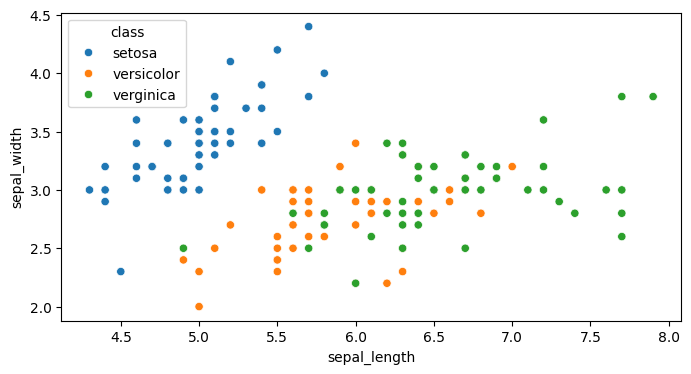

In [19]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="sepal_length", y="sepal_width", hue="class")
plt.show()

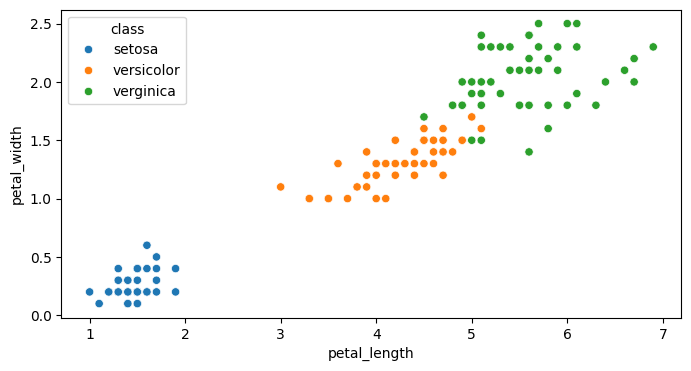

In [20]:
plt.figure(figsize=(8, 4))
sns.scatterplot(df, x="petal_length", y="petal_width", hue="class")
plt.show()

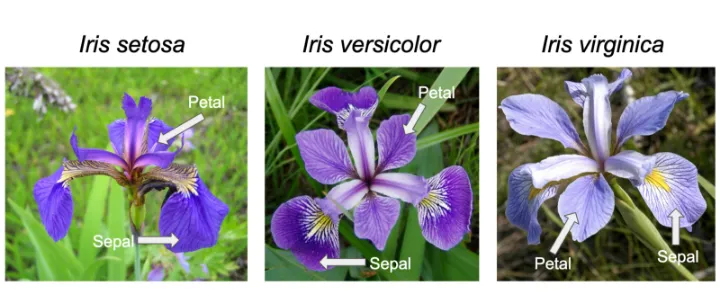

In [21]:
df.iloc[:50]

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [22]:
df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,target,class
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
55,5.7,2.8,4.5,1.3,1,versicolor
56,6.3,3.3,4.7,1.6,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
58,6.6,2.9,4.6,1.3,1,versicolor
59,5.2,2.7,3.9,1.4,1,versicolor


In [23]:
df.iloc[100:]

,sepal_length,sepal_width,petal_length,petal_width,target,class
100,6.3,3.3,6.0,2.5,2,verginica
101,5.8,2.7,5.1,1.9,2,verginica
102,7.1,3.0,5.9,2.1,2,verginica
103,6.3,2.9,5.6,1.8,2,verginica
104,6.5,3.0,5.8,2.2,2,verginica
105,7.6,3.0,6.6,2.1,2,verginica
106,4.9,2.5,4.5,1.7,2,verginica
107,7.3,2.9,6.3,1.8,2,verginica
108,6.7,2.5,5.8,1.8,2,verginica
109,7.2,3.6,6.1,2.5,2,verginica


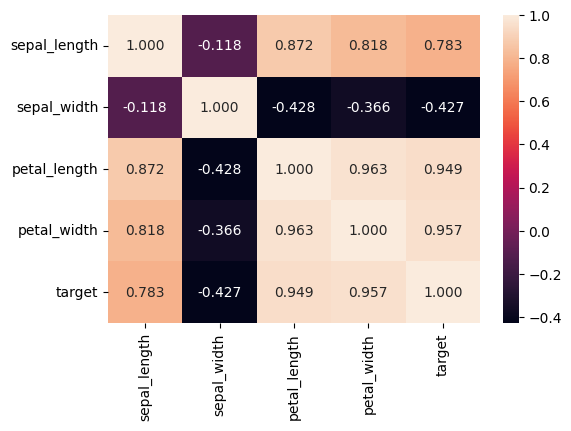

In [29]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop("class", axis=1).corr(), annot=True, fmt=".3f")
plt.show()

In [30]:
X = df.drop(["target", "class"], axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y = df["class"]

In [32]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    verginica
146    verginica
147    verginica
148    verginica
149    verginica
Name: class, Length: 150, dtype: object

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=45)

In [34]:
X_train.shape

(112, 4)

In [35]:
X_test.shape

(38, 4)

In [36]:
model = DecisionTreeClassifier()

In [37]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
training_score = model.score(X_train, y_train)
training_score

1.0

In [41]:
y_pred = model.predict(X_test)

In [43]:
testing_score = accuracy_score(y_test, y_pred)
testing_score

0.9473684210526315

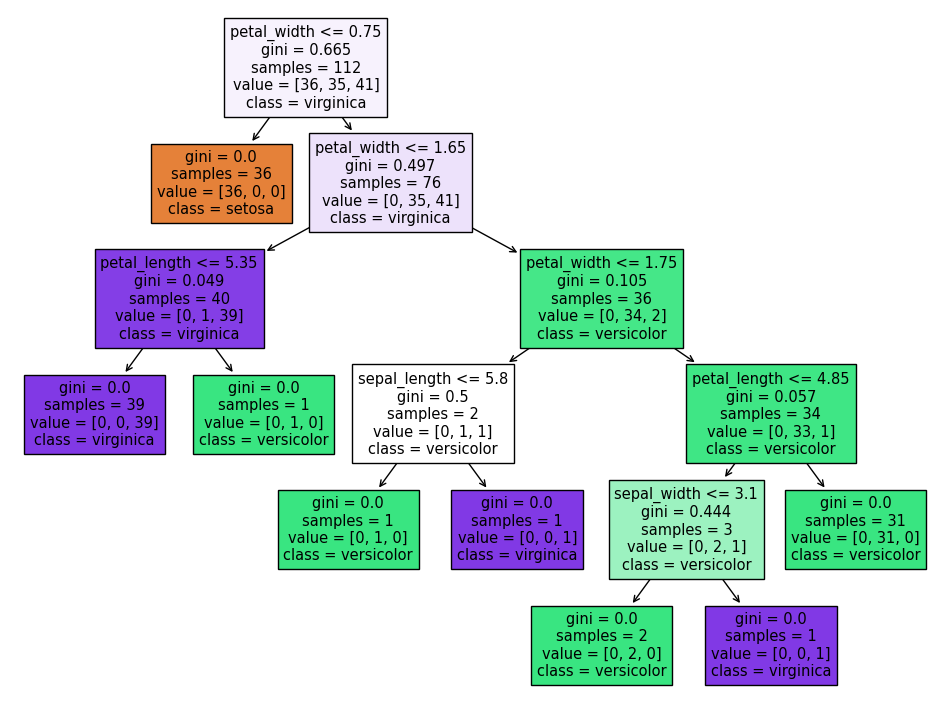

In [50]:
plt.figure(figsize=(12, 9))
plot_tree(model, filled=True, class_names=dataset.target_names, feature_names=X.columns)
plt.show()

In [49]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [51]:
df[df["petal_width"]<=0.75]

,sepal_length,sepal_width,petal_length,petal_width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [52]:
tunned_model = DecisionTreeClassifier(max_depth=2, max_features=3)

In [53]:
tunned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=3)

In [54]:
train_acc_tunned = tunned_model.score(X_train, y_train)
train_acc_tunned

0.9464285714285714

In [55]:
y_pred_tunned = tunned_model.predict(X_test)

In [56]:
test_acc_tunned = accuracy_score(y_test, y_pred_tunned)
test_acc_tunned

0.9736842105263158

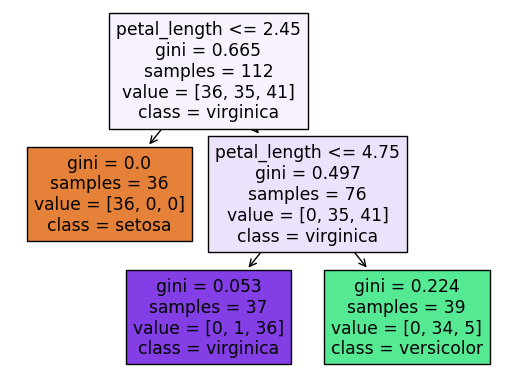

In [57]:
# plt.figure(figsize=(12, 9))
plot_tree(tunned_model, filled=True, class_names=dataset.target_names, feature_names=X.columns)
plt.show()

In [58]:
parameters = {"criterion":["gini", "entropy"],
             "max_depth":[1, 2, 3, 4, 5],
             "max_features":[1, 2, 3, 4],
             "random_state":[23, 53, 12, 85, 43]}

In [59]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),
                   param_grid=parameters, verbose=True, n_jobs=-1, cv=5, scoring="accuracy")

In [60]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'random_state': [23, 53, 12, 85, 43]},
             scoring='accuracy', verbose=True)

In [61]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'random_state': 85}

In [62]:
pre_model = DecisionTreeClassifier(max_depth=2, max_features=2, criterion="gini", random_state=85)

In [63]:
pre_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=85)

In [66]:
train_acc_pre = pre_model.score(X_train, y_train)
train_acc_pre

0.9732142857142857

In [67]:
y_pred_pre = pre_model.predict(X_test)

In [68]:
test_acc_pre = accuracy_score(y_test, y_pred_pre)
test_acc_pre

0.9210526315789473

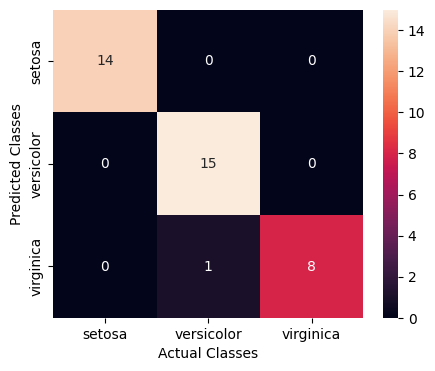

In [80]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tunned), annot=True, fmt="d", 
           xticklabels=dataset.target_names, yticklabels=dataset.target_names)
plt.xlabel("Actual Classes")
plt.ylabel("Predicted Classes")
plt.show()

In [81]:
import joblib

In [82]:
joblib.dump(model, "DT_Model_Export")

['DT_Model_Export']